C:\Users\afedy\AppData\Local\Temp\ipykernel_9184\4116412578.py:8: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("1.csv")


             id        date  confirmed    deaths  recovered  tests  vaccines  \
96112  5f04e56c  2020-01-03        NaN       NaN        NaN    NaN       NaN   
96113  5f04e56c  2020-01-04        NaN       NaN        NaN    NaN       NaN   
96114  5f04e56c  2020-01-05        NaN       NaN        NaN    NaN       NaN   
96115  5f04e56c  2020-01-06        NaN       NaN        NaN    NaN       NaN   
96116  5f04e56c  2020-01-07        NaN       NaN        NaN    NaN       NaN   
...         ...         ...        ...       ...        ...    ...       ...   
97269  5f04e56c  2023-03-05  5701743.0  119213.0        NaN    NaN       NaN   
97270  5f04e56c  2023-03-06  5701855.0  119216.0        NaN    NaN       NaN   
97271  5f04e56c  2023-03-07  5701959.0  119217.0        NaN    NaN       NaN   
97272  5f04e56c  2023-03-08  5711818.0  119281.0        NaN    NaN       NaN   
97273  5f04e56c  2023-03-09  5711929.0  119283.0        NaN    NaN       NaN   

       people_vaccinated  people_fully_

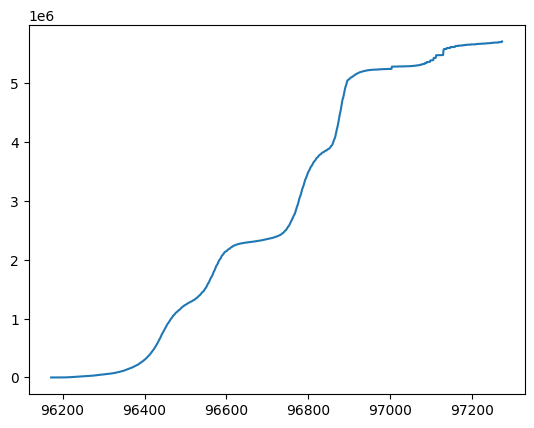

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler


df1 = pd.read_csv("1.csv")

ukraine_data = df1[df1['key_apple_mobility'] == 'Ukraine']
data = ukraine_data[ukraine_data['confirmed'] != '']
print(data)

plt.plot(data.index, data['confirmed'])

In [4]:
data = data[['date', 'confirmed']]
data

,date,confirmed
96112,2020-01-03,NaN
96113,2020-01-04,NaN
96114,2020-01-05,NaN
96115,2020-01-06,NaN
96116,2020-01-07,NaN
...,...,...
97269,2023-03-05,5701743.0
97270,2023-03-06,5701855.0
97271,2023-03-07,5701959.0
97272,2023-03-08,5711818.0


In [5]:
import datetime 

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

data['date'] = data['date'].apply(str_to_datetime)


In [6]:
data.index = data.pop('date')
data

,confirmed
date,
2020-01-03,NaN
2020-01-04,NaN
2020-01-05,NaN
2020-01-06,NaN
2020-01-07,NaN
...,...
2023-03-05,5701743.0
2023-03-06,5701855.0
2023-03-07,5701959.0


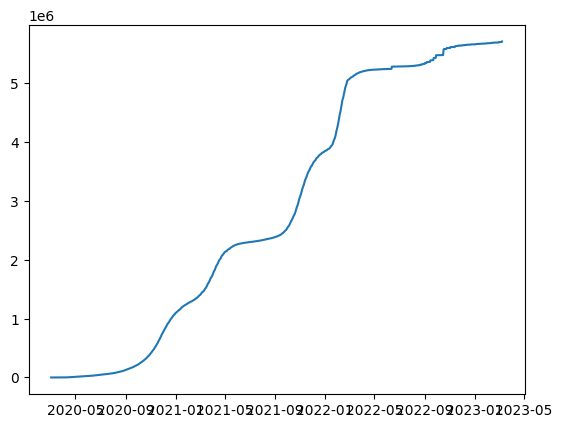

In [7]:

plt.plot(data.index, data['confirmed'])

In [8]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date  = str_to_datetime(last_date_str)

    target_date = first_date
    
    dates = []
    X, Y = [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)
        
        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        values = df_subset['confirmed'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
        
        if last_time:
            break
        
        target_date = next_date

        if target_date == last_date:
            last_time = True
        
    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates
    
    X = np.array(X)
    for i in range(0, n):
        X[:, i]
        ret_df[f'Target-{n-i}'] = X[:, i]
    
    ret_df['Target'] = Y

    return ret_df


windowed_df = df_to_windowed_df(data, 
                                '2020-03-08', 
                                '2023-03-01', 
                                n=5)
windowed_df

,Target Date,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2020-03-08,1.0,1.0,1.0,1.0,1.0,1.0
1,2020-03-09,1.0,1.0,1.0,1.0,1.0,1.0
2,2020-03-10,1.0,1.0,1.0,1.0,1.0,1.0
3,2020-03-11,1.0,1.0,1.0,1.0,1.0,1.0
4,2020-03-12,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
1084,2023-02-25,5693110.0,5693215.0,5693260.0,5693342.0,5693474.0,5693596.0
1085,2023-02-26,5693215.0,5693260.0,5693342.0,5693474.0,5693596.0,5693650.0
1086,2023-02-27,5693260.0,5693342.0,5693474.0,5693596.0,5693650.0,5693753.0
1087,2023-02-28,5693342.0,5693474.0,5693596.0,5693650.0,5693753.0,5693846.0


In [9]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, 0]

    middle_matrix = df_as_np[:, 1:-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -1]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape


((1089,), (1089, 5, 1), (1089,))

(55, 5, 1)


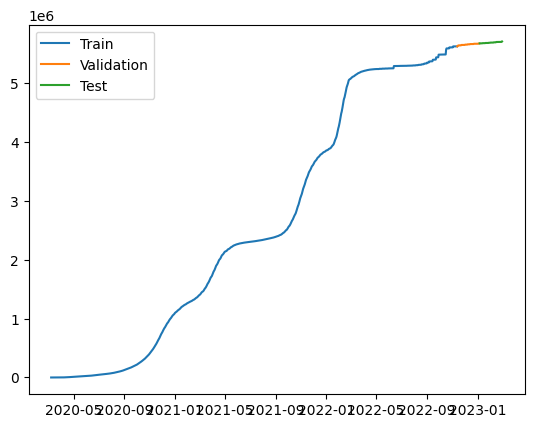

In [10]:
q_90 = int(len(dates) * .9)
q_95 = int(len(dates) * .95)

dates_train, X_train, y_train = dates[:q_90], X[:q_90], y[:q_90]

dates_val, X_val, y_val = dates[q_90:q_95], X[q_90:q_95], y[q_90:q_95]
dates_test, X_test, y_test = dates[q_95:], X[q_95:], y[q_95:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])
print(X_test.shape)

In [11]:
scaler = MinMaxScaler()

X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_train_scaled = X_train_scaled.reshape(X_train.shape) 


X_val_reshaped = X_val.reshape(X_val.shape[0], -1)
X_val_scaled = scaler.transform(X_val_reshaped)
X_val_scaled = X_val_scaled.reshape(X_val.shape)

X_test_reshaped = X_test.reshape(X_test.shape[0], -1)
X_test_scaled = scaler.transform(X_test_reshaped)
X_test_scaled = X_test_scaled.reshape(X_test.shape)
print(X_test.shape)

(55, 5, 1)


In [12]:
y_train_reshaped = y_train.reshape(-1, 1)
y_val_reshaped = y_val.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
y_val_scaled = scaler_y.transform(y_val_reshaped)
y_test_scaled = scaler_y.transform(y_test_reshaped)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential([layers.Input((5, 1)),
                    layers.LSTM(128, return_sequences=True),  
                    layers.Dropout(0.3),  
                    layers.LSTM(128), 
                    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.000000001)),
                    layers.Dropout(0.2),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.000005),
              metrics=['mean_absolute_error'])

early_stopping = EarlyStopping(monitor='val_loss', patience=190, restore_best_weights=True)
model.fit(X_train_scaled, y_train_scaled, validation_data=(X_val_scaled, y_val_scaled), epochs=5000, callbacks=[early_stopping])

Epoch 1/5000
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3402 - mean_absolute_error: 0.4492 - val_loss: 1.0185 - val_mean_absolute_error: 1.0089
Epoch 2/5000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3533 - mean_absolute_error: 0.4729 - val_loss: 1.0000 - val_mean_absolute_error: 0.9997
Epoch 3/5000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3168 - mean_absolute_error: 0.4402 - val_loss: 0.9817 - val_mean_absolute_error: 0.9905
Epoch 4/5000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3306 - mean_absolute_error: 0.4524 - val_loss: 0.9630 - val_mean_absolute_error: 0.9810
Epoch 5/5000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3264 - mean_absolute_error: 0.4464 - val_loss: 0.9458 - val_mean_absolute_error: 0.9722
Epoch 6/5000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3206 - mean_absolute_error: 0.4405 - val_loss: 0.9259 - val_mean_absolute_error: 0.9620
Epoch 7/5000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3083 - mean_absolute_error: 0.4294 -

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Mean Absolute Error: 0.011590368
Mean Squared Error: 0.00020650166
Root Mean Squared Error: 0.014370166


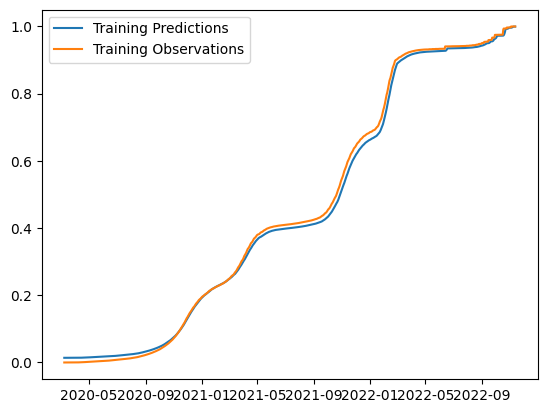

In [14]:
train_predictions = model.predict(X_train_scaled).flatten()

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_train_scaled, train_predictions)
mse = mean_squared_error(y_train_scaled, train_predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train_scaled)
plt.legend(['Training Predictions', 'Training Observations'])

In [15]:
train_predictions_unscaled = scaler_y.inverse_transform(train_predictions.reshape(-1, 1))
y_train_original = scaler_y.inverse_transform(y_train_scaled)

from sklearn.metrics import r2_score
r_squared = r2_score(y_train_original, train_predictions_unscaled)

print("R-squared:", r_squared)

R-squared: 0.9984161030158606


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
R-squared: 0.826088981380915


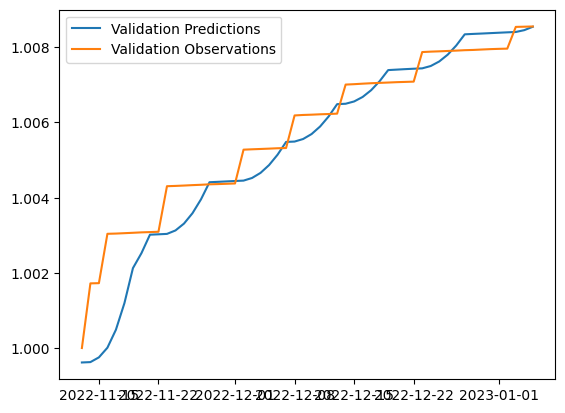

In [16]:
val_predictions = model.predict(X_val_scaled).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val_scaled)
plt.legend(['Validation Predictions', 'Validation Observations'])

r_squared = r2_score(y_val_scaled, val_predictions)

print("R-squared:", r_squared)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
R-squared: 0.8754543467800834


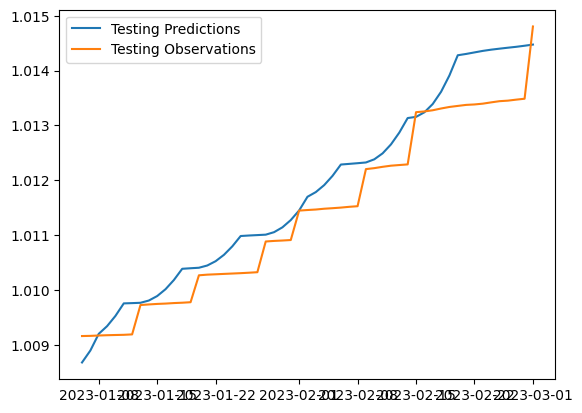

In [17]:
X_test_prediction = model.predict(X_test_scaled).flatten()
plt.plot(dates_test, X_test_prediction)
plt.plot(dates_test, y_test_scaled)
plt.legend(['Testing Predictions', 'Testing Observations'])


r_squared = r2_score(y_test_scaled, X_test_prediction)

print("R-squared:", r_squared)


In [18]:
X_test_prediction

array([1.0086764, 1.0088944, 1.0091984, 1.0093384, 1.009525 , 1.0097538,
       1.009759 , 1.0097648, 1.0098059, 1.0098876, 1.0100124, 1.0101798,
       1.0103849, 1.0103948, 1.0104039, 1.0104449, 1.0105233, 1.0106398,
       1.0107943, 1.0109825, 1.0109918, 1.0109994, 1.0110072, 1.0110527,
       1.0111408, 1.0112731, 1.0114484, 1.011698 , 1.0117836, 1.0119106,
       1.0120794, 1.0122861, 1.012298 , 1.0123104, 1.0123237, 1.0123811,
       1.01249  , 1.0126534, 1.012869 , 1.0131339, 1.013155 , 1.0132384,
       1.0133897, 1.0136129, 1.0139108, 1.0142789, 1.0143028, 1.0143307,
       1.0143585, 1.0143808, 1.014399 , 1.0144165, 1.0144329, 1.0144525,
       1.0144738], dtype=float32)

In [19]:
future_predictions = []
for _ in range(10):
    next_day_prediction = model.predict(X_test_prediction[-5:].reshape(1, 5, 1))
    future_predictions.append(next_day_prediction)

    next_day_prediction = next_day_prediction.reshape(1, -1)
    X_test_prediction_last_4 = X_test_prediction[-4:].reshape(-1, 1)  

    X_test_prediction = np.concatenate((X_test_prediction_last_4, next_day_prediction), axis=0)

future_amount = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1))
future_amount


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[5705253.5],
       [5705754.5],
       [5706723. ],
       [5708241.5],
       [5710395. ],
       [5713294.5],
       [5714614.5],
       [5716413.5],
       [5718579.5],
       [5720945.5]], dtype=float32)